#Mobile Price Prediction using KNN & SVM




##Dataset Information:
Features Description
battery_power Total energy a battery can store in one time measured in mAh.

clock_speed The speed at which microprocessor executes instructions.

fc Front Camera megapixels.

int_memory Internal Memory in Gigabytes.

m_dep Mobile Depth in cm.

mobile_wt Weight of the mobile phone.

n_cores Number of cores of a processor.

pc Primary Camera megapixels.

px_height Pixel Resolution Height.

px_width Pixel Resolution Width.

ram Random Access Memory in MegaBytes.

sc_h Screen Height of mobile in cm.

sc_w Screen Width of mobile in cm.

talk_time The longest time that a single battery charge will last when you are.

price_range This is the target variable with the value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Applied Models:
KNN
SVM

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Mobile_data.csv")

#Data Analysis 

In [ ]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [ ]:
df.shape

(2000, 15)

Insights:
Dataset has 15 features and 2000 attributes.
Out of which 1 feature is dependant and other independant. 

In [ ]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


No Constant Feature - Std is not zero for any feature

In [ ]:
df.columns


Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [ ]:
df.price_range.value_counts()


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Data contains 2000 rows & 21 Columns

In [ ]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

Dataset contains 0 NULL Value


#Data Visualization & Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72d5068fd0>,
      dtype=object)

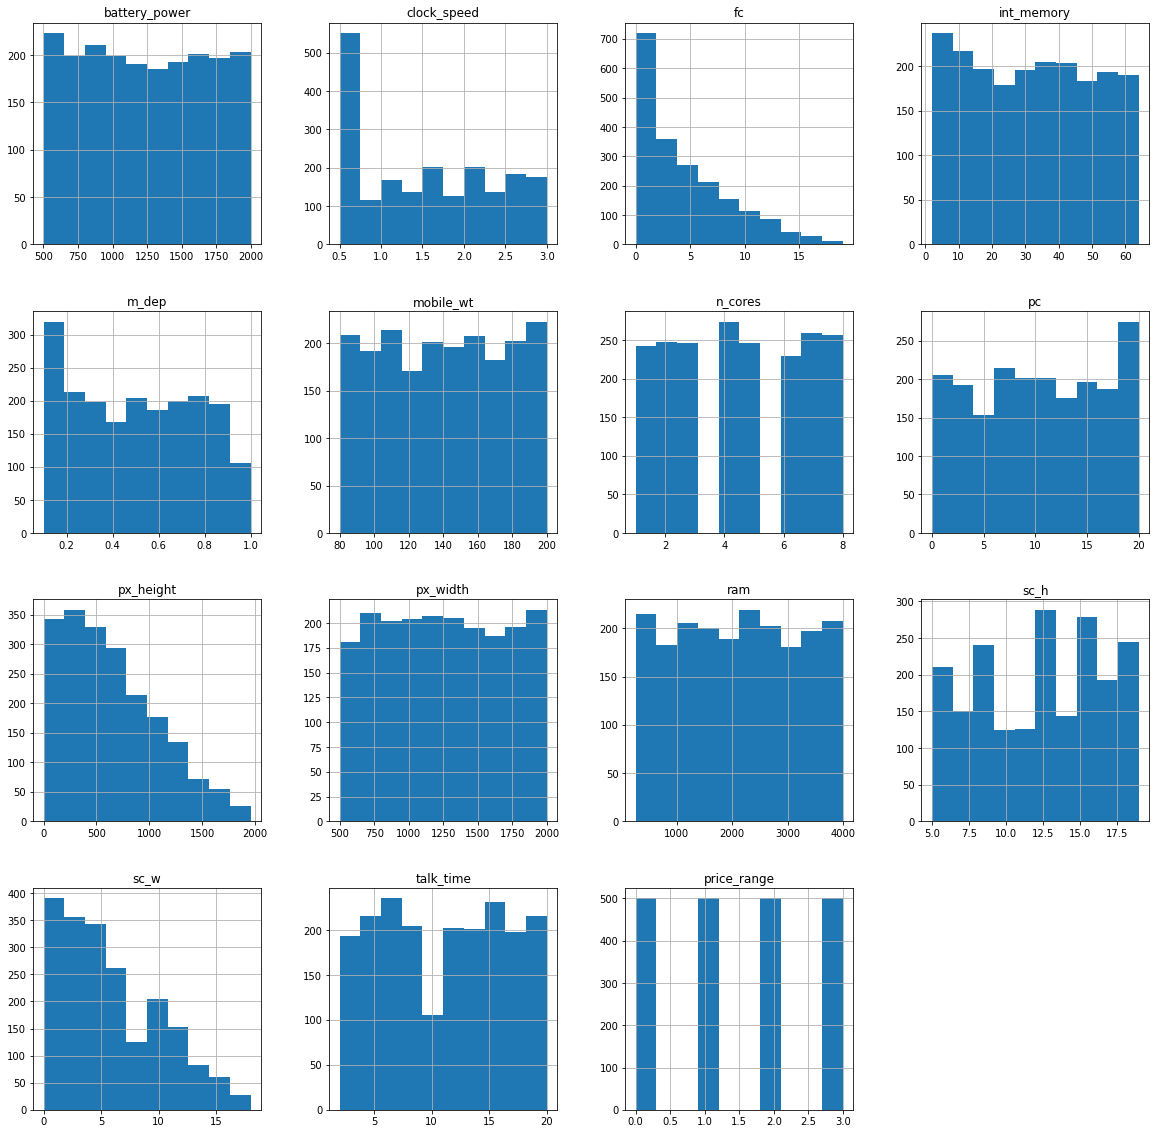

In [ ]:
df.hist(figsize=(20,20))

Insights:

Price_range has 4 categories from 0 to 3.

dataset is right skewed.



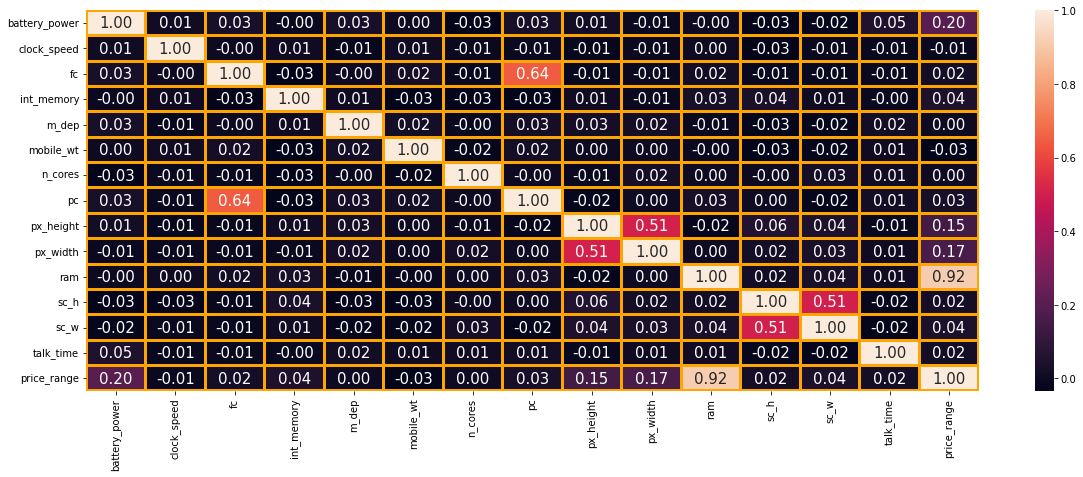

In [ ]:
plt.figure(figsize = (20, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

Insights:
dataset features has no correlation.

In [ ]:
num_cols = df.select_dtypes(exclude = 'object')

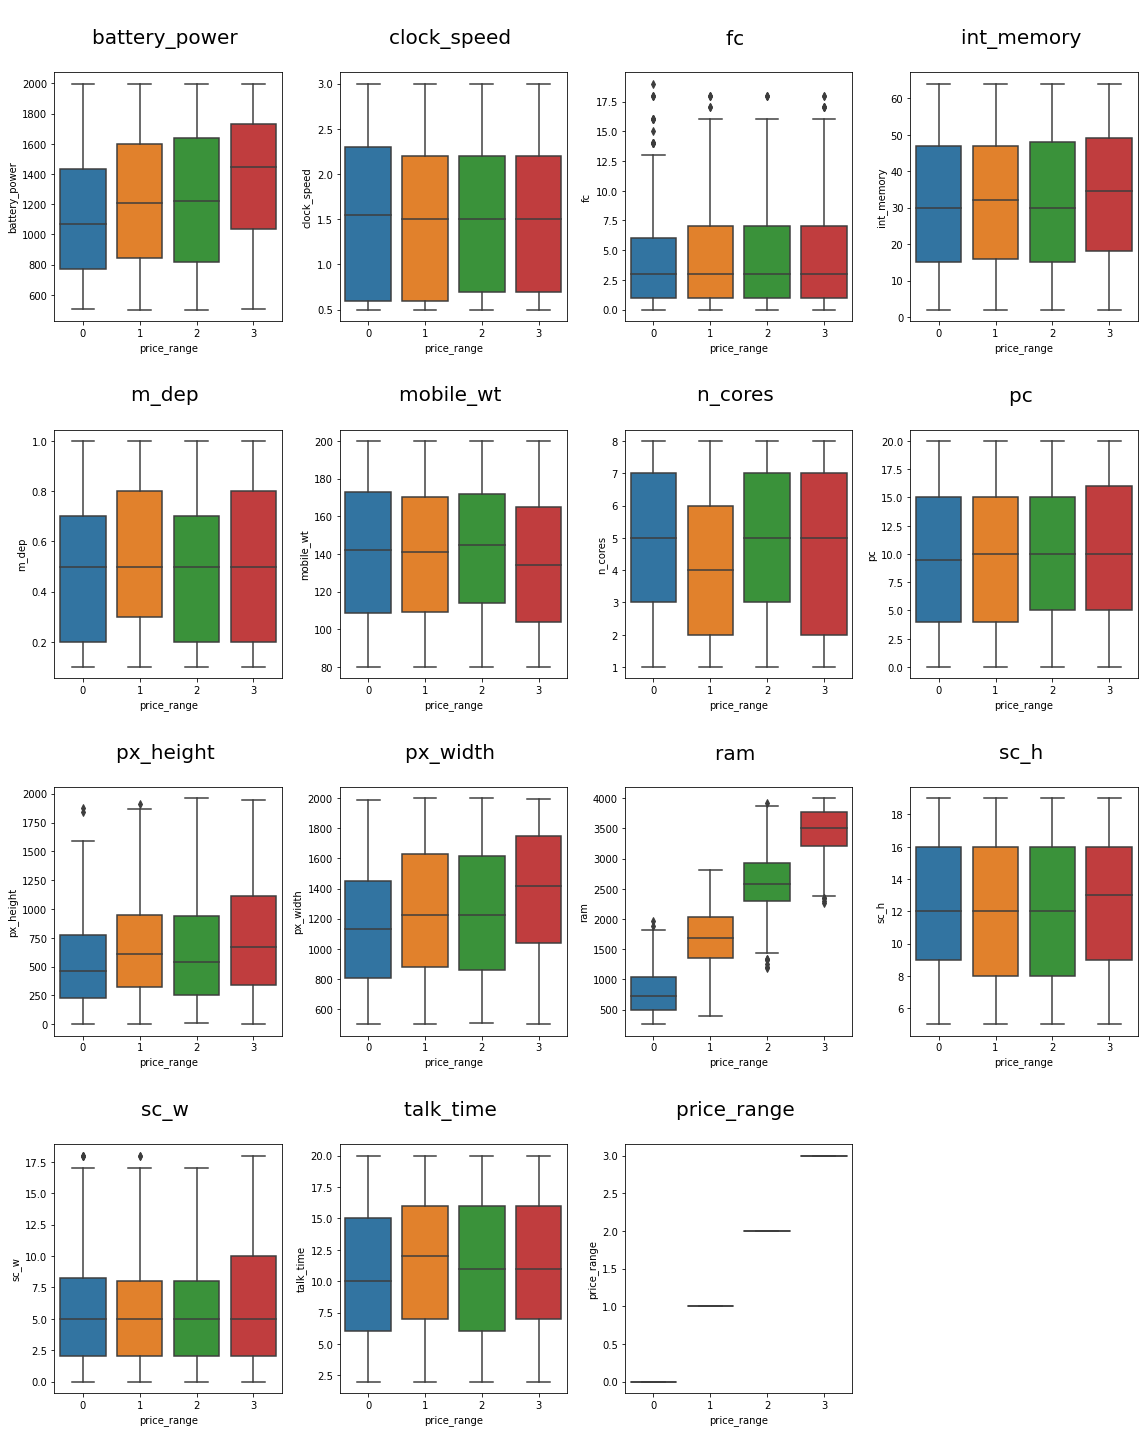

In [ ]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x='price_range' ,y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
figsize=(20,20)
sns.pairplot(df, hue="price_range")

Output hidden; open in https://colab.research.google.com to view.

From the above illsutration we can make out that dataset has outlier.



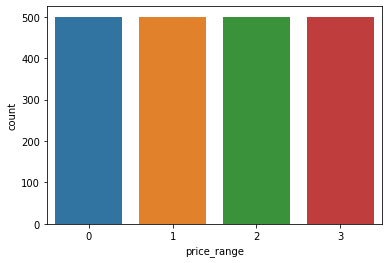

In [ ]:
sns.countplot(x="price_range",data=df)   #price_range has equal no's of counts

5.Data Cleaning

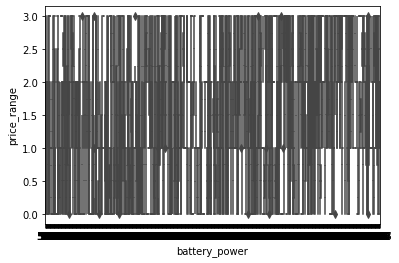

In [ ]:
sns.boxplot(x="battery_power" , y="price_range",data=df)
plt.show()

Standardization action to ensure that data are scaled uniformly



6. Deciding x and y

In [ ]:
x=df.drop("price_range",axis=1)

In [ ]:
x

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [ ]:
y=df['price_range']

In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
x_train.shape, x_test.shape

((1400, 14), (600, 14))

In [ ]:

y_train = [1 if value>0.8 else 0 for value in y_train]
y_train[:5]
     

[0, 1, 1, 1, 1]

In [ ]:
y_test=[1 if value>0.8 else 0 for value in y_test]
y_test[:5]

[1, 0, 1, 0, 0]

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

#K-Nearest Neighbour (KNN) Classification

Let's see what will be score if we use KNN algorithm.


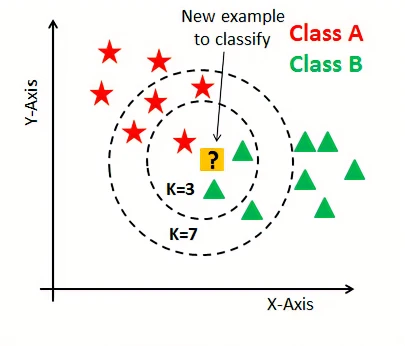

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier() 

In [ ]:
knn= KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
prediction=knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       147
           1       1.00      0.94      0.97       453

    accuracy                           0.95       600
   macro avg       0.92      0.96      0.94       600
weighted avg       0.96      0.95      0.95       600



In [ ]:
print(confusion_matrix(y_test,prediction))

[[145   2]
 [ 28 425]]


Minimum error:- 0.015 at K = 8


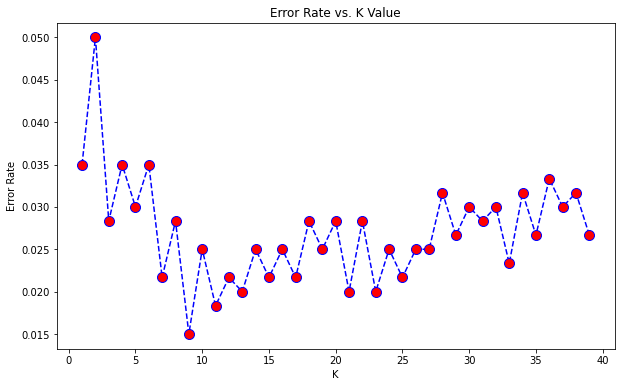

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

From the plot, you can see that the smallest error we got is 0.01 at K=12.

Further on, we visualize the plot between accuracy and K value.

Maximum accuracy:- 0.985 at K = 8


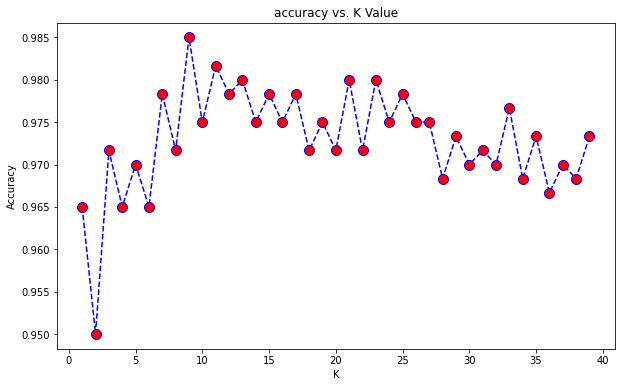

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

We got the accuracy of 0.99 at K=12.

As we already derived the error plot and got the minimum error at k=12, so we will get better efficiency at that K value.

#Support Vector Machine (SVM) Algorithm



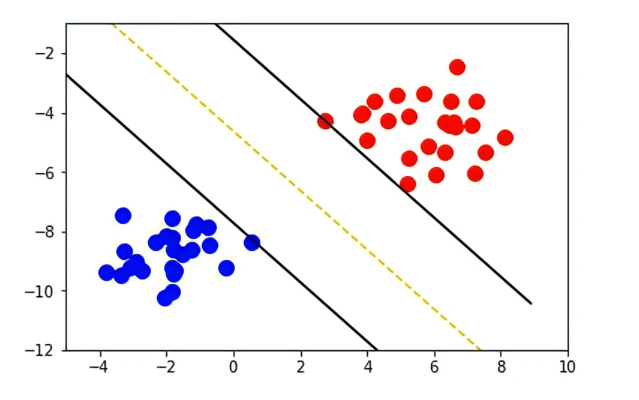

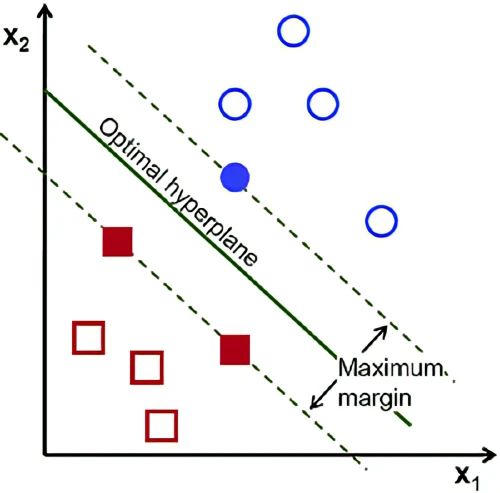

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))


train accuracy: 0.9892857142857143
test accuracy: 0.9783333333333334


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       147
           1       1.00      0.94      0.97       453

    accuracy                           0.95       600
   macro avg       0.92      0.96      0.94       600
weighted avg       0.96      0.95      0.95       600



In [ ]:
print(confusion_matrix(y_test,prediction))

[[145   2]
 [ 28 425]]
